# **SVM UNTUK KLASIFIKASI ATAU SUPER VECTOR CLASSIFICATION (SVC)**

## **Import Libraries**

In [28]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, accuracy_score

## **Preprocessing Data**

In [11]:
# Importing the dataset
dataset = pd.read_csv('Facebook_Ads.csv')

# Read the dataset
dataset

,Names,Time Spent on Site,Salary,Clicked
0,Martina Avila,25.649648,55330.06006,0
1,Harlan Barnes,32.456107,79049.07674,1
2,Naomi Rodriquez,20.945978,41098.60826,0
3,Jade Cunningham,54.039325,37143.35536,1
4,Cedric Leach,34.249729,37355.11276,0
...,...,...,...,...
494,Rigel,19.222746,44969.13495,0
495,Walter,22.665662,41686.20425,0
496,Vanna,35.320239,23989.80864,0
497,Pearl,26.539170,31708.57054,0


**- Pengecekan tipe data**

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Names               499 non-null    object 
 1   Time Spent on Site  499 non-null    float64
 2   Salary              499 non-null    float64
 3   Clicked             499 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.7+ KB


**- Penghapusan kolom tak terpakai**

In [13]:
# Mendrop kolom tertentu dari DataFrame
dataset.drop(columns=['Names'], inplace=True)

dataset

,Time Spent on Site,Salary,Clicked
0,25.649648,55330.06006,0
1,32.456107,79049.07674,1
2,20.945978,41098.60826,0
3,54.039325,37143.35536,1
4,34.249729,37355.11276,0
...,...,...,...
494,19.222746,44969.13495,0
495,22.665662,41686.20425,0
496,35.320239,23989.80864,0
497,26.539170,31708.57054,0


**- Korelasi**

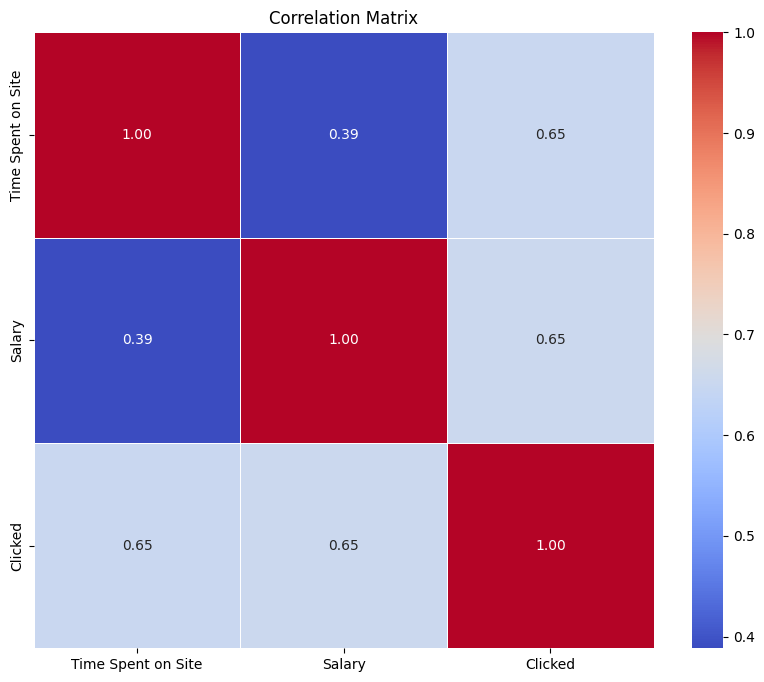

In [14]:
# Generate matriks korelasi
correlation_matrix = dataset.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

**- Duplikat**

In [15]:
# Mengecek duplikat berdasarkan semua kolom
duplicate_rows = dataset[dataset.duplicated()]

# Mengecek duplikat berdasarkan beberapa kolom tertentu
duplicate_rows_subset = dataset[dataset.duplicated(subset=['Time Spent on Site', 'Salary', 'Clicked'])]

# Menampilkan hasil
print("Duplikat berdasarkan semua kolom:")
print(duplicate_rows)

print("\nDuplikat berdasarkan subset kolom:")
print(duplicate_rows_subset)

Duplikat berdasarkan semua kolom:
Empty DataFrame
Columns: [Time Spent on Site, Salary, Clicked]
Index: []

Duplikat berdasarkan subset kolom:
Empty DataFrame
Columns: [Time Spent on Site, Salary, Clicked]
Index: []


**- Missing value**

In [17]:
# Mengecek jumlah nilai yang hilang (missing value) dalam setiap kolom DataFrame
dataset.isna().sum()

Time Spent on Site    0
Salary                0
Clicked               0
dtype: int64

## **Membangun Model**

In [18]:
# Assuming the dataset has 5 columns and you want to access the 0 and 1st columns
# Adjust the column index if needed
X = dataset.iloc[:, [0, 1]].values
y = dataset.iloc[:, 2].values

In [19]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [20]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [24]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [25]:
# Fitting classifier to the Training set
classifier = SVC(kernel='linear', random_state=0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [26]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [29]:
# Making the Acciracy and Confusion Matrix
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(cm)

Accuracy: 0.864
Confusion Matrix:
[[53  8]
 [ 9 55]]


<ipython-input-30-abcc3cc96ac7>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


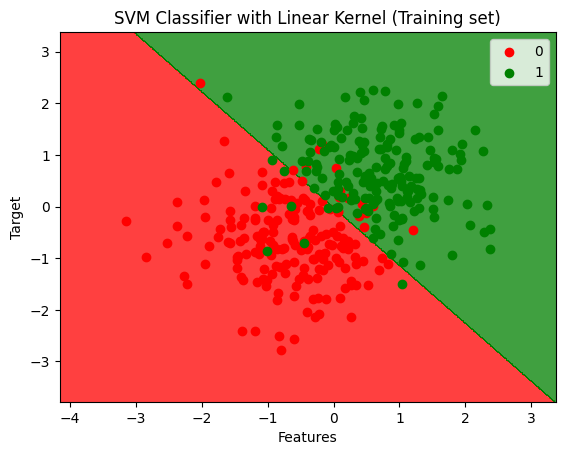

In [30]:
# Visualizing the Training set results for Linear Kernel
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)
plt.title('SVM Classifier with Linear Kernel (Training set)')
plt.xlabel('Features')
plt.ylabel('Target')
plt.legend()
plt.show()

<ipython-input-31-9cf3106b9b2e>:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


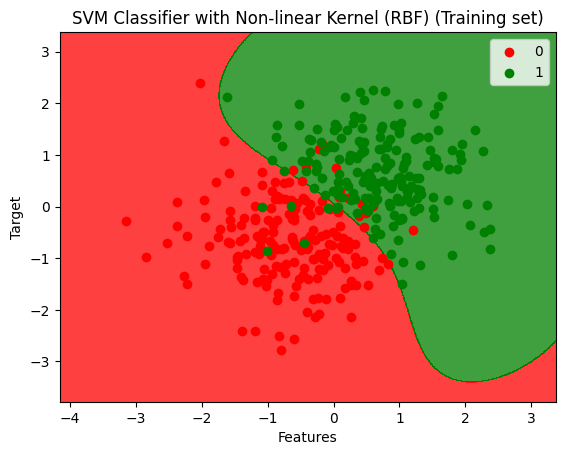

In [31]:
# Fitting classifier to the Training set with Non-linear Kernel (RBF)
classifier = SVC(kernel='rbf', random_state=0)
classifier.fit(X_train, y_train)

# Visualizing the Training set results for Non-linear Kernel (RBF)
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)
plt.title('SVM Classifier with Non-linear Kernel (RBF) (Training set)')
plt.xlabel('Features')
plt.ylabel('Target')
plt.legend()
plt.show()